<a href="https://colab.research.google.com/github/suwisitlk/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [3]:
# Load the iris data
iris = datasets.load_iris() #ข้อมูลฟีเจอร์ของดอกไม้
X = iris.data[:, 2:] #ดึงมาแค่ 2คือ  ตัวที่ 3กับ กับ 4
y = iris.target

print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

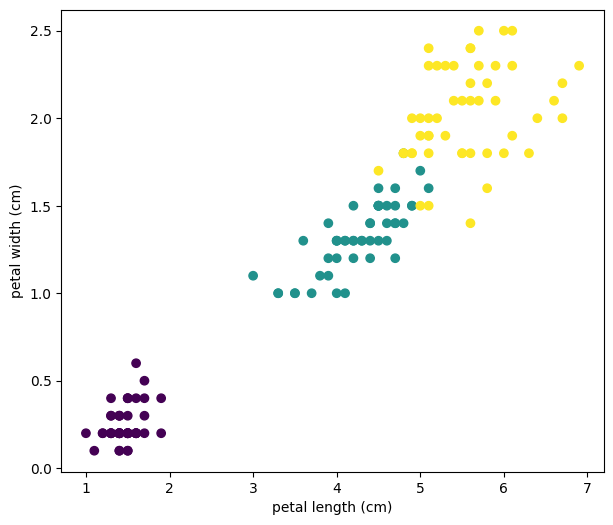

In [6]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [5]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [7]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3)

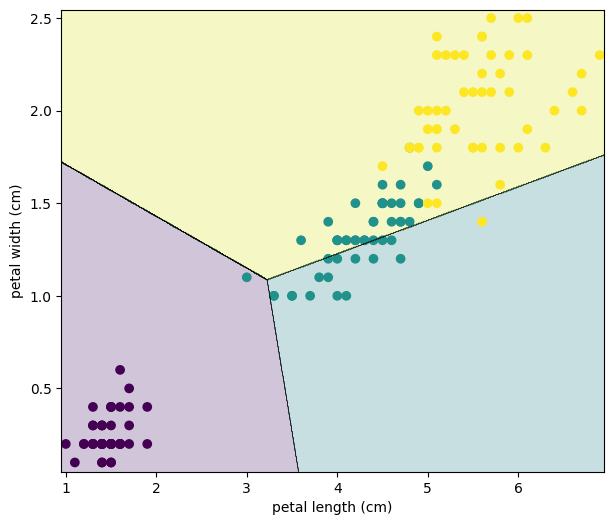

In [10]:
linsvm = LinearSVC(C=0.1)

linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

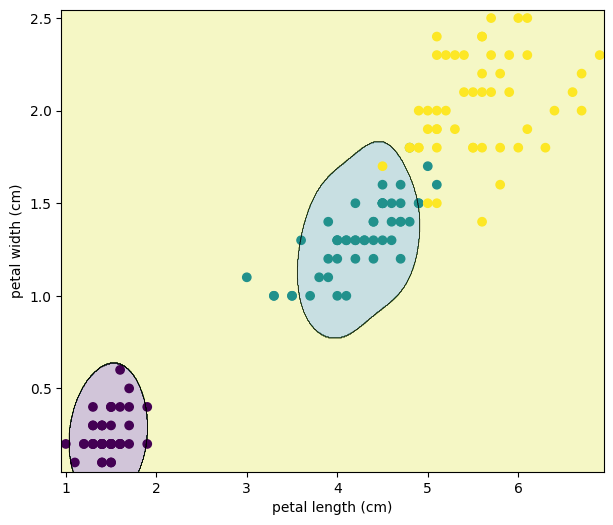

In [11]:
svm = SVC(C=0.1, kernel='rbf', gamma= 10) #scale ห่างกัน 0.1 แสดงว่า gamma =10

svm.fit(X_train, y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

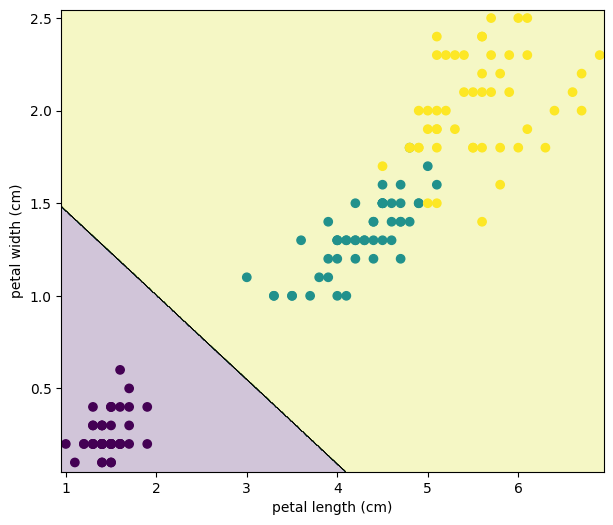

In [13]:
linsvm001 = LinearSVC(C=0.01,loss='hinge', max_iter=100000)

linsvm001.fit(X_train, y_train)

plot_decision_boundary(linsvm001, X, y)

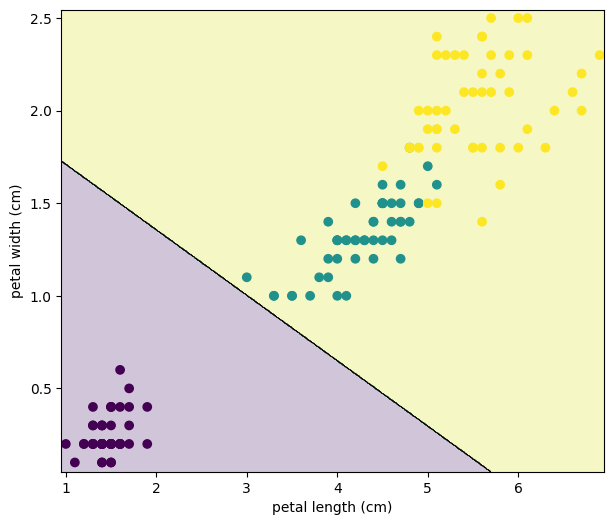

In [14]:
linsvm01 = LinearSVC(C=0.1,loss='hinge', max_iter=100000)

linsvm01.fit(X_train, y_train)

plot_decision_boundary(linsvm01, X, y)

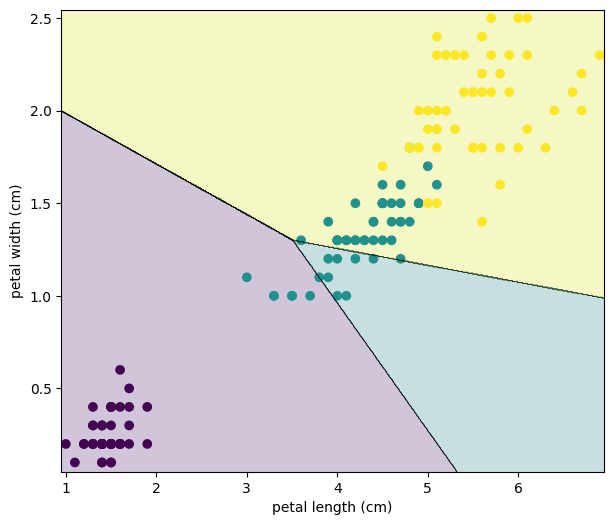

In [15]:
linsvm1 = LinearSVC(C=1.0,loss='hinge', max_iter=100000)

linsvm1.fit(X_train, y_train)

plot_decision_boundary(linsvm1, X, y)

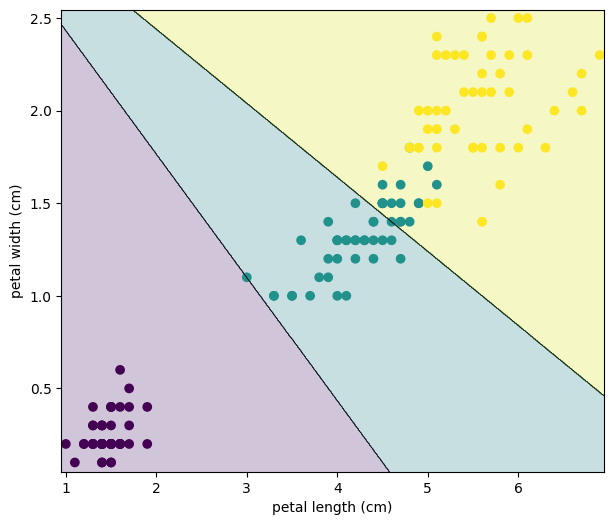

In [16]:
linsvm10 = LinearSVC(C=10.0,loss='hinge', max_iter=100000)

linsvm10.fit(X_train, y_train)

plot_decision_boundary(linsvm10, X, y)

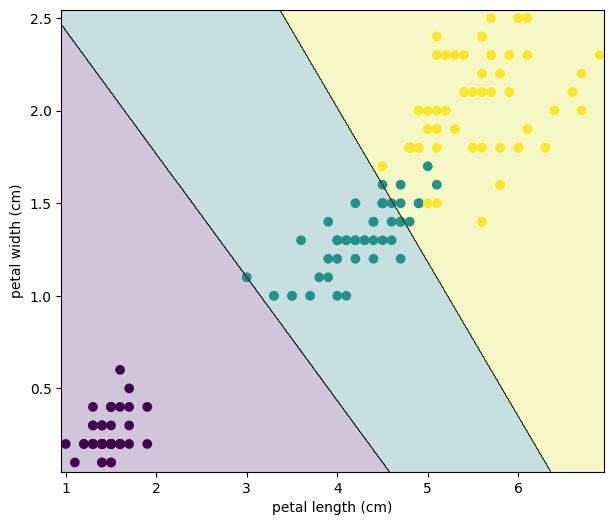

In [17]:
linsvm100 = LinearSVC(C=100.0,loss='hinge', max_iter=100000)

linsvm100.fit(X_train, y_train)

plot_decision_boundary(linsvm100, X, y)

#### What is the effect of C on the decision boundary?
*   $C$ น้อย $\rightarrow$ Margin กว้าง, ยอมให้ผิด ซึ่งทำให้่ Generalize ดีกว่า
*   $C$ มาก $\rightarrow$ Margin แคบ, เพิ่มความแม่นยำบน train set แต่เสี่ยง Overfitting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [46]:
from sklearn.metrics import accuracy_score
# c =100.0

y_pred = linsvm100.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy


print('test error :', test_error)


test error : 0.0888888888888889


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

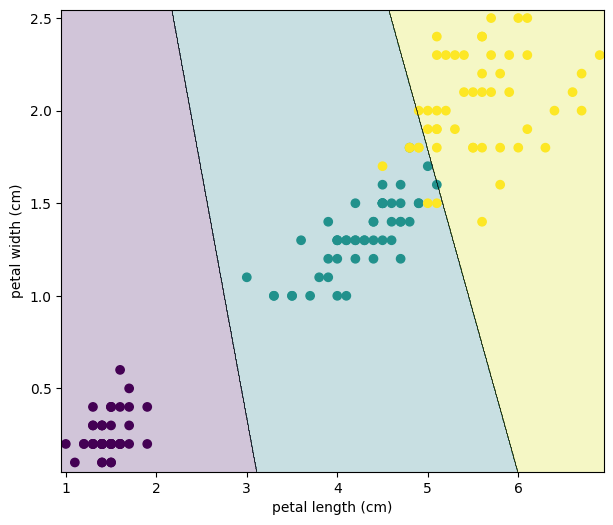

In [36]:
svm001 = SVC(C=1.0, kernel='rbf',max_iter=100000, gamma= 0.01)
svm001.fit(X_train, y_train)
plot_decision_boundary(svm001, X, y)

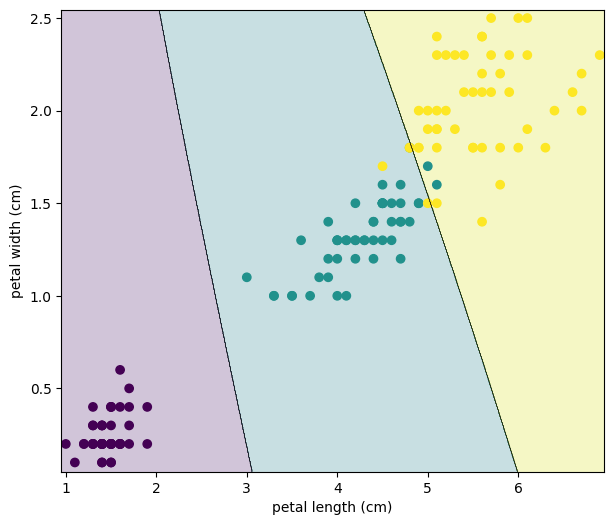

In [35]:
svm01 = SVC(C=1.0, kernel='rbf',max_iter=100000, gamma= 0.1)
svm01.fit(X_train, y_train)
plot_decision_boundary(svm01, X, y)

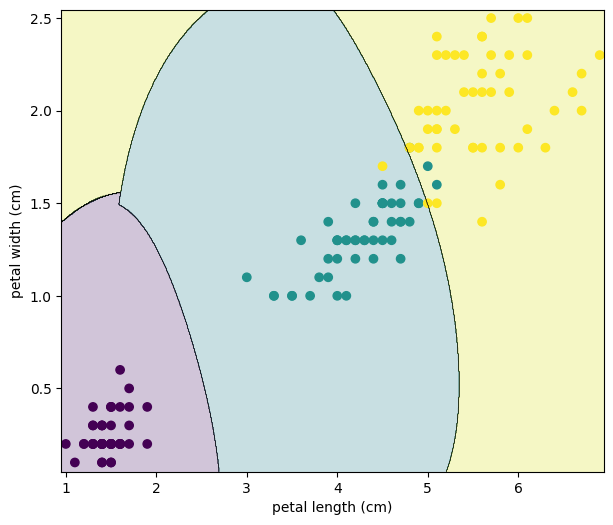

In [34]:
svm1 = SVC(C=1.0, kernel='rbf',max_iter=100000, gamma= 1.0)
svm1.fit(X_train, y_train)
plot_decision_boundary(svm1, X, y)

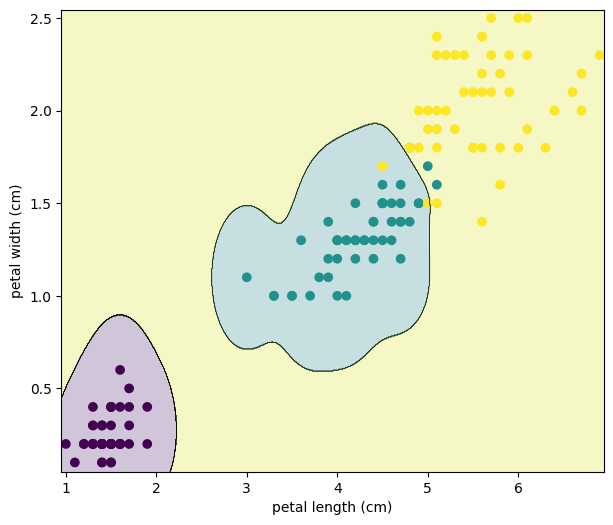

In [33]:
svm10 = SVC(C=1.0, kernel='rbf',max_iter=100000, gamma= 10.0)
svm10.fit(X_train, y_train)
plot_decision_boundary(svm10, X, y)

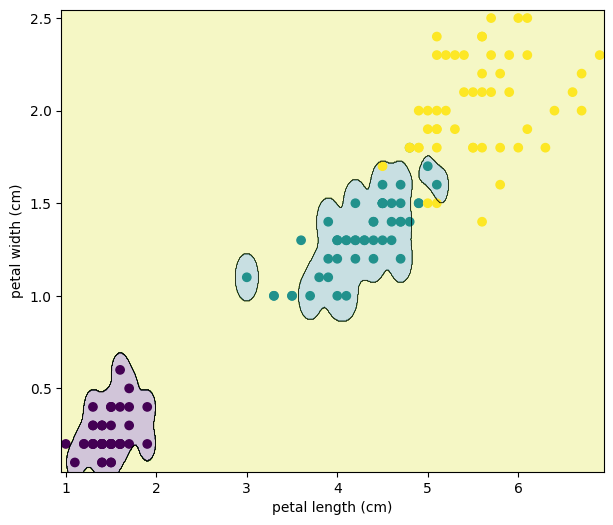

In [32]:
svm100 = SVC(C=1.0, kernel='rbf',max_iter=100000, gamma= 100.0)
svm100.fit(X_train, y_train)
plot_decision_boundary(svm100, X, y)

#### What is the effect of gamma on the decision boundary?
*  Gamma สูง $\rightarrow$ เส้นแบ่งจะ หยักและตามรูป ไปตามจุดข้อมูลมาก เสี่ยง Overfitting
*  Gamma ต่ำ $\rightarrow$ เส้นแบ่งจะ เรียบและกว้าง  เส้น Smooth กว่า

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [45]:
# gamma = 10.0

y_pred_svc = svm10.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
test_error_svc = 1 - accuracy_svc

print('test error SVC :', test_error_svc)

test error SVC : 0.022222222222222254


In [44]:
total_support_vectors = sum(svm10.n_support_)
print('the number of support vectors :',  total_support_vectors)

the number of support vectors : 41


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

#### Exercise 6

*  I prefer Kernel SVM

1.  Explain using test accuracy
*  ใน Linear SVM จะเห็นได้ว่ามี Accurancy น้อยกว่า Kernel SVM ซึ่งแสดงให้เห็นว่า ข้อมูลจาก Kernel SVM สามารถตรวจจับข้อมูลบน test set ได้แม่นยำกว่า เนื่องจากมีการคำนวณช่วงรอยต่อแบบเส้นโค้ง ที่สามารถแบ่งข้อมูลได้ดีกว่า

2. Explaing using decision boundary plot

*  จากการ plot ข้อมูลพบว่า เมื่อแบ่งแบบ  Linear SVM เส้นตรงจะเรียบซึ่งทำให้ข้อมูลไม่สามารถแบ่งข้อมูลที่ปนอยู่ได้ นอกจากนี้ มีการแบ่งขนาดข้อมูลที่ยืดหยุ่นน้อยทำให้ข้อมูลบน test set ไม่สามารถแบ่งข้อมูลได้ถูก แต่ใน Kernel SVM จะมีการโค้งรับเฉพาะส่วน สามารถจับแต่ละกลุ่มได้เฉพาะ ทำให้สามารถแยกข้อมูลต่างๆได้ดีกว่า

####